In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# read the file
df = pd.read_csv('AlumniGiving - DonationHistory.csv')
df.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
0,003o000000pO6zhAAC,0,0.0,Gainesville,FL,32605-6400,NaN,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0
1,003o000000pOSIxAAO,1,100.0,Pasadena,CA,91105-1515,NaN,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1
2,003o000000pNvhHAAS,4,1700.0,San Rafael,CA,94901-2478,NaN,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0
3,003o000000q0hl1AAA,0,0.0,San Antonio,TX,78232-4154,T,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0
4,003o000000pOZe9AAG,5,500.0,Westborough,MA,1581,NaN,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           118854 non-null  object 
 1   NUMBER_OF_DONATIONS  118854 non-null  int64  
 2   VALUE_OF_DONATIONS   118854 non-null  float64
 3   CITY                 99728 non-null   object 
 4   STATE                99728 non-null   object 
 5   ZIP                  99728 non-null   object 
 6   MI                   12957 non-null   object 
 7   ALUMNI_TYPE          118854 non-null  object 
 8   UG_CLASS_YEAR        118854 non-null  int64  
 9   UG_SCHOOL            70297 non-null   object 
 10  GRAD_DEGREE          54423 non-null   object 
 11  GRAD_CLASS_YEAR      54422 non-null   float64
 12  GRAD_SCHOOL          54393 non-null   object 
 13  GENDER               118854 non-null  object 
 14  MARRIED_TO_ALUM      118854 non-null  object 
 15  ROTC             

In [4]:
# creating an instance of Labelencoder

def label_encoder(df,columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
    return df, encoders

columns=["CITY","ALUMNI_TYPE","STATE","UG_SCHOOL","GRAD_DEGREE","GRAD_SCHOOL","GENDER","MARRIED_TO_ALUM"]
label_encoder(df,columns)

(                ACCOUNT_ID  NUMBER_OF_DONATIONS  VALUE_OF_DONATIONS  CITY  \
 0       003o000000pO6zhAAC                    0                 0.0  1406   
 1       003o000000pOSIxAAO                    1               100.0  3029   
 2       003o000000pNvhHAAS                    4              1700.0  3554   
 3       003o000000q0hl1AAA                    0                 0.0  3519   
 4       003o000000pOZe9AAG                    5               500.0  4347   
 ...                    ...                  ...                 ...   ...   
 118849  0031J00001Uxe4RQAR                    0                 0.0  3532   
 118850  0031J00001Wsp1cQAB                    0                 0.0  2631   
 118851  0031J00001W3RyKQAV                    0                 0.0  3153   
 118852  0031J00001U449tQAB                    0                 0.0  4515   
 118853  0031J00001U4HvRQAV                    0                 0.0   118   
 
         STATE         ZIP   MI  ALUMNI_TYPE  UG_CLASS_YEAR  U

In [5]:
df_orignal = pd.read_csv('AlumniGiving - DonationHistory.csv')
df_label=pd.merge(df[columns],df_orignal,left_index=True,right_index=True)
df_label.head()

,CITY_x,ALUMNI_TYPE_x,STATE_x,UG_SCHOOL_x,GRAD_DEGREE_x,GRAD_SCHOOL_x,GENDER_x,MARRIED_TO_ALUM_x,ACCOUNT_ID,NUMBER_OF_DONATIONS,...,ALUMNI_TYPE_y,UG_CLASS_YEAR,UG_SCHOOL_y,GRAD_DEGREE_y,GRAD_CLASS_YEAR,GRAD_SCHOOL_y,GENDER_y,MARRIED_TO_ALUM_y,ROTC,JC
0,1406,0,13,10,28,2,1,0,003o000000pO6zhAAC,0,...,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0
1,3029,0,8,10,4,7,1,0,003o000000pOSIxAAO,1,...,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1
2,3554,0,8,10,4,7,1,0,003o000000pNvhHAAS,4,...,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0
3,3519,1,51,9,38,9,0,0,003o000000q0hl1AAA,0,...,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0
4,4347,1,25,6,38,9,1,0,003o000000pOZe9AAG,5,...,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1


In [6]:
df_label.to_csv ('label.csv')

In [7]:
df.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
0,003o000000pO6zhAAC,0,0.0,1406,13,32605-6400,NaN,0,1969,10,28,1969.0,2,1,0,0,0
1,003o000000pOSIxAAO,1,100.0,3029,8,91105-1515,NaN,0,1968,10,4,1968.0,7,1,0,0,1
2,003o000000pNvhHAAS,4,1700.0,3554,8,94901-2478,NaN,0,1964,10,4,1964.0,7,1,0,0,0
3,003o000000q0hl1AAA,0,0.0,3519,51,78232-4154,T,1,1967,9,38,NaN,9,0,0,0,0
4,003o000000pOZe9AAG,5,500.0,4347,25,1581,NaN,1,1964,6,38,NaN,9,1,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           118854 non-null  object 
 1   NUMBER_OF_DONATIONS  118854 non-null  int64  
 2   VALUE_OF_DONATIONS   118854 non-null  float64
 3   CITY                 118854 non-null  int32  
 4   STATE                118854 non-null  int32  
 5   ZIP                  99728 non-null   object 
 6   MI                   12957 non-null   object 
 7   ALUMNI_TYPE          118854 non-null  int32  
 8   UG_CLASS_YEAR        118854 non-null  int64  
 9   UG_SCHOOL            118854 non-null  int32  
 10  GRAD_DEGREE          118854 non-null  int32  
 11  GRAD_CLASS_YEAR      54422 non-null   float64
 12  GRAD_SCHOOL          118854 non-null  int32  
 13  GENDER               118854 non-null  int32  
 14  MARRIED_TO_ALUM      118854 non-null  int32  
 15  ROTC             

In [9]:
df_drop=df.drop(['ACCOUNT_ID','ZIP','MI','GRAD_CLASS_YEAR','UG_CLASS_YEAR'],axis=1)

In [10]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NUMBER_OF_DONATIONS  118854 non-null  int64  
 1   VALUE_OF_DONATIONS   118854 non-null  float64
 2   CITY                 118854 non-null  int32  
 3   STATE                118854 non-null  int32  
 4   ALUMNI_TYPE          118854 non-null  int32  
 5   UG_SCHOOL            118854 non-null  int32  
 6   GRAD_DEGREE          118854 non-null  int32  
 7   GRAD_SCHOOL          118854 non-null  int32  
 8   GENDER               118854 non-null  int32  
 9   MARRIED_TO_ALUM      118854 non-null  int32  
 10  ROTC                 118854 non-null  int64  
 11  JC                   118854 non-null  int64  
dtypes: float64(1), int32(8), int64(3)
memory usage: 7.3 MB


In [11]:
# change the order of attribute
attribute=('NUMBER_OF_DONATIONS','CITY','STATE','ALUMNI_TYPE','UG_CLASS_YEAR',
           'UG_SCHOOL','GRAD_DEGREE','GRAD_CLASS_YEAR','GRAD_SCHOOL','GENDER',
           'MARRIED_TO_ALUM','ROTC','JC','VALUE_OF_DONATIONS')
corr_data = df.reindex(attribute, axis=1)
corr_data

,NUMBER_OF_DONATIONS,CITY,STATE,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,VALUE_OF_DONATIONS
0,0,1406,13,0,1969,10,28,1969.0,2,1,0,0,0,0.0
1,1,3029,8,0,1968,10,4,1968.0,7,1,0,0,1,100.0
2,4,3554,8,0,1964,10,4,1964.0,7,1,0,0,0,1700.0
3,0,3519,51,1,1967,9,38,NaN,9,0,0,0,0,0.0
4,5,4347,25,1,1964,6,38,NaN,9,1,0,0,1,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118849,0,3532,8,0,2021,10,6,2021.0,1,0,0,0,0,0.0
118850,0,2631,8,1,1984,2,38,NaN,9,1,0,0,0,0.0
118851,0,3153,8,0,2021,10,6,2021.0,1,0,0,0,0,0.0
118852,0,4515,60,0,2020,10,5,2020.0,7,1,0,0,0,0.0


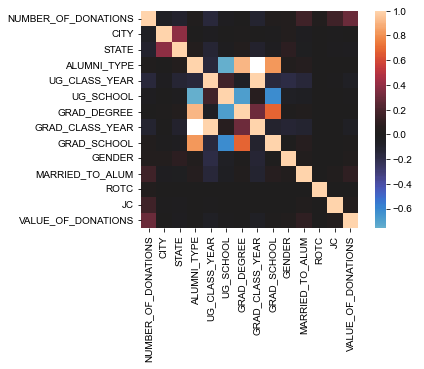

In [12]:
# plot a heatmap to see the correlation
df_corr = corr_data.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns,center=0,square=True)
sns.set(rc={'figure.figsize':(8,8)})

In [13]:
# create a new column-have made donation or not, 1=yes,0=never
def donated_or_not(row):
    if row['VALUE_OF_DONATIONS'] == 0:
        return 0
    else:
        return 1

df_drop['DONATE']= df_drop.apply(lambda row: donated_or_not(row), axis=1)

### Models
1. Y is donate or not (simple binary)

In [14]:
x = df_drop.drop(['VALUE_OF_DONATIONS','NUMBER_OF_DONATIONS','DONATE'],axis=1)
y = df_drop['DONATE']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from imblearn.under_sampling import RandomUnderSampler

Ran = RandomUnderSampler(random_state=42)
X_res, Y_res = Ran.fit_resample(X_train, Y_train)

In [17]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(Y_res))

Original dataset shape Counter({0: 98620, 1: 20234})
Resampled dataset shape Counter({0: 16202, 1: 16202})


### Random Forest

In [18]:
from sklearn import ensemble
rf_classifier  = ensemble.RandomForestClassifier(n_estimators=140, max_depth=30, random_state=30)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=30, n_estimators=140, random_state=30)

In [19]:
#Show the Random Forest results - no resample
print("train score:", rf_classifier.score(X_train, Y_train))
print("test score:", rf_classifier.score(X_test, Y_test))

train score: 0.8911477340849574
test score: 0.8150267132219932


In [20]:
Y_test_pre =  rf_classifier.predict(X_test)
Y_test_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(54.260000000000005, 0.5, 'Predicted label')

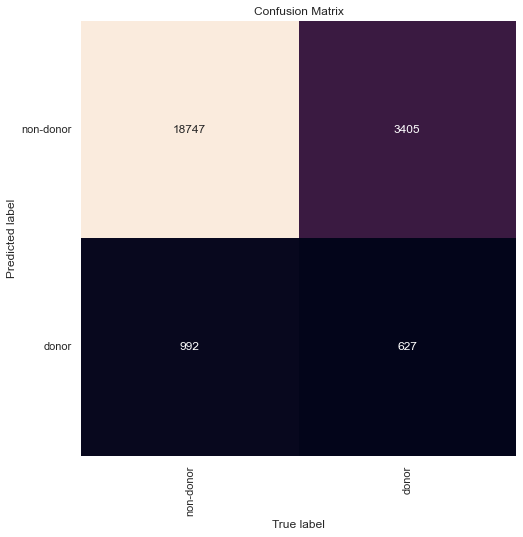

In [21]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,Y_test_pre)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
ax= plt.subplot()

ax.xaxis.set_ticklabels(['non-donor','donor']); 
ax.yaxis.set_ticklabels(['non-donor','donor']);                         
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [22]:
#Show the Random Forest results - resample
rf_classifier.fit(X_res, Y_res)
print("train score:", rf_classifier.score(X_res, Y_res))
print("test score:", rf_classifier.score(X_test, Y_test))

train score: 0.8141896062214541
test score: 0.6239114887888604


### Picking

In [23]:
df_non_donor = df_drop[df_drop['NUMBER_OF_DONATIONS']==0]
df_non_donor.shape

(98620, 13)

In [24]:
df_non_donor=df_non_donor.drop(['VALUE_OF_DONATIONS','NUMBER_OF_DONATIONS','DONATE'],axis=1)

In [25]:
proba=rf_classifier.predict_proba(df_non_donor)
proba

array([[0.12488095, 0.87511905],
       [0.51404762, 0.48595238],
       [0.49947489, 0.50052511],
       ...,
       [0.82607399, 0.17392601],
       [0.82005408, 0.17994592],
       [0.84285714, 0.15714286]])

In [26]:
non_donor_y = rf_classifier.predict(df_non_donor)
print(non_donor_y) 

[1 0 1 ... 0 0 0]


In [27]:
df_non_donor['Y']=non_donor_y 

In [28]:
df_non_donor['Proba_YES']=proba.T[1]

In [29]:
df_non_donor.head()

,CITY,STATE,ALUMNI_TYPE,UG_SCHOOL,GRAD_DEGREE,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,Y,Proba_YES
0,1406,13,0,10,28,2,1,0,0,0,1,0.875119
3,3519,51,1,9,38,9,0,0,0,0,0,0.485952
6,3532,8,1,0,38,9,1,0,0,0,1,0.500525
7,685,8,1,9,38,9,0,0,0,0,0,0.272999
8,2227,8,1,6,38,9,1,0,0,0,0,0.335307


In [30]:
df_picked=df_non_donor.nlargest(n=10000, columns=['Proba_YES'])

In [31]:
df_non_donor['Y'].value_counts ()

0    64759
1    33861
Name: Y, dtype: int64

In [32]:
df_picked.head()

,CITY,STATE,ALUMNI_TYPE,UG_SCHOOL,GRAD_DEGREE,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,Y,Proba_YES
39,3596,8,1,0,38,9,1,1,0,0,1,1.0
65,3788,8,1,0,38,9,1,1,0,0,1,1.0
138,241,8,1,0,38,9,1,0,0,1,1,1.0
304,3319,8,1,0,38,9,1,1,0,0,1,1.0
666,948,8,1,0,38,9,0,1,0,0,1,1.0


In [33]:
df_picked=pd.merge(df_picked,df['ACCOUNT_ID'],left_index=True,right_index=True)
df_picked.head()

,CITY,STATE,ALUMNI_TYPE,UG_SCHOOL,GRAD_DEGREE,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,Y,Proba_YES,ACCOUNT_ID
39,3596,8,1,0,38,9,1,1,0,0,1,1.0,003o000000q0fa1AAA
65,3788,8,1,0,38,9,1,1,0,0,1,1.0,003o000000pOKDaAAO
138,241,8,1,0,38,9,1,0,0,1,1,1.0,003o000000pNlXTAA0
304,3319,8,1,0,38,9,1,1,0,0,1,1.0,003o000000pNwdRAAS
666,948,8,1,0,38,9,0,1,0,0,1,1.0,003o000000q0aG4AAI


In [34]:
df_picked['ACCOUNT_ID']

39       003o000000q0fa1AAA
65       003o000000pOKDaAAO
138      003o000000pNlXTAA0
304      003o000000pNwdRAAS
666      003o000000q0aG4AAI
                ...        
83450    003o000000q0eBSAAY
68742    003o000000pOGKIAA4
595      003o000000pOUfuAAG
6293     003o000000pNxlRAAS
13325    003o000000pNowRAAS
Name: ACCOUNT_ID, Length: 10000, dtype: object

In [35]:
df_picked.to_csv ('id.csv')

In [36]:
attribute=('CITY','STATE','ALUMNI_TYPE',
           'UG_SCHOOL','GRAD_DEGREE','GRAD_SCHOOL','GENDER',
           'MARRIED_TO_ALUM','ROTC','JC','Proba_YES')
corr_data = df_picked.reindex(attribute, axis=1)
corr_data.head()

,CITY,STATE,ALUMNI_TYPE,UG_SCHOOL,GRAD_DEGREE,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,Proba_YES
39,3596,8,1,0,38,9,1,1,0,0,1.0
65,3788,8,1,0,38,9,1,1,0,0,1.0
138,241,8,1,0,38,9,1,0,0,1,1.0
304,3319,8,1,0,38,9,1,1,0,0,1.0
666,948,8,1,0,38,9,0,1,0,0,1.0


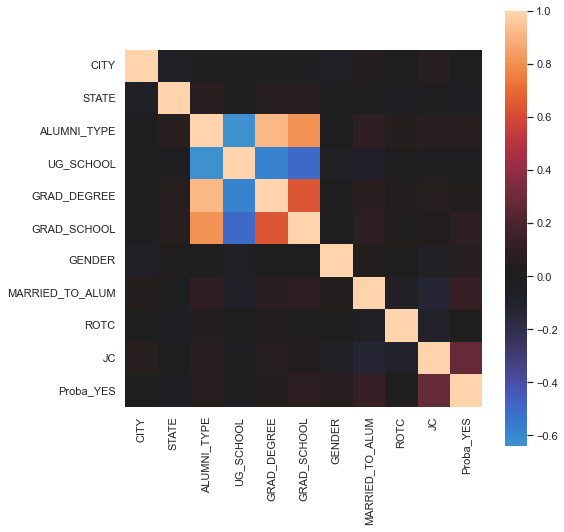

In [37]:
# plot a heatmap to see the correlation
df_corr = corr_data.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns,center=0,square=True)
sns.set(rc={'figure.figsize':(8,8)})

### Linear Regreesion
2. Y is a continuous value

In [38]:
df_drop_fil= df_drop[df_drop['VALUE_OF_DONATIONS']>0]
df_drop_fil.head()

,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ALUMNI_TYPE,UG_SCHOOL,GRAD_DEGREE,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,DONATE
1,1,100.0,3029,8,0,10,4,7,1,0,0,1,1
2,4,1700.0,3554,8,0,10,4,7,1,0,0,0,1
4,5,500.0,4347,25,1,6,38,9,1,0,0,1,1
5,5,370.0,80,8,1,0,38,9,1,0,0,0,1
9,8,800.0,2180,8,1,0,38,9,1,0,0,0,1


In [39]:
# create a new column-average donation value
df_drop_fil['AVG_VALUE']= df_drop_fil['VALUE_OF_DONATIONS']/df_drop_fil['NUMBER_OF_DONATIONS']

C:\Users\gina3\AppData\Local\Temp/ipykernel_16216/2803670812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_fil['AVG_VALUE']= df_drop_fil['VALUE_OF_DONATIONS']/df_drop_fil['NUMBER_OF_DONATIONS']


In [40]:
df_drop_fil['AVG_VALUE'].describe().round(1)

count    20234.0
mean       279.2
std       1467.9
min          1.0
25%         26.7
50%         57.5
75%        128.1
max      50000.0
Name: AVG_VALUE, dtype: float64

In [41]:
x = df_drop_fil.drop(['VALUE_OF_DONATIONS','NUMBER_OF_DONATIONS','AVG_VALUE'],axis=1)
y = df_drop_fil['AVG_VALUE'].values

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
Lin= LinearRegression()
Lin.fit(X_train,Y_train)

LinearRegression()

In [44]:
#Show the liner regression results
print("train score:", Lin.score(X_train, Y_train))
print("test score:", Lin.score(X_test, Y_test))

train score: 0.014019541342351283
test score: 0.01600160661872474
